# I066 Srihari Thyagarajan DL Lab 7

In [85]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout


### Task 1: Load the fashion mnist dataset into your notebook. The dataset is available in Keras.
#### a. Load it using from keras.datasets import fashion_mnist

In [86]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Task 2: Pre-processing and prepare the data for giving to the neural network. 
#### a. Explore the dataset (Performing standard EDA operations).

In [87]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [88]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [89]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


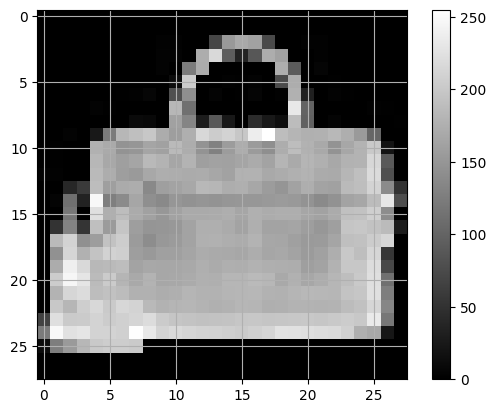

Class ID: 8 and Class name: Bag


In [91]:
index = 1010
plt.imshow(train_images[index], cmap='gray') # printing 1010th image
plt.colorbar()
plt.grid(True)
plt.show()
print("Class ID: %s and Class name: %s" % (train_labels[index], class_names[train_labels[index]]))

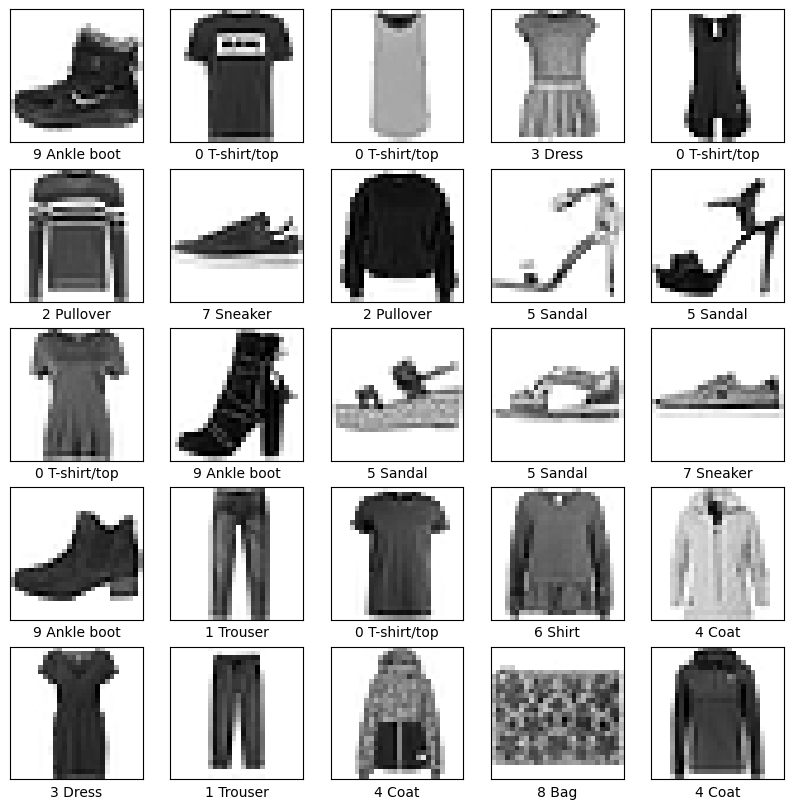

In [92]:
# Exploring first 25 images of the dataset:
plt.figure(figsize=(10, 10))
for i in range(25): # 25 images
  plt.subplot(5, 5, i + 1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (train_labels[i], class_names[train_labels[i]])) # Assigning name to each image
plt.show()

In [93]:
print("Shape of Training images:", train_images.shape)
print("Shape of Testing images:", test_images.shape)
print("Number of classes present in the dataset:", len(set(train_labels)))

Shape of Training images: (60000, 28, 28)
Shape of Testing images: (10000, 28, 28)
Number of classes present in the dataset: 10


#### b. Determine the number of classes
#### c. Normalize the dataset and flatten it to be suitable for applying to a ANN.


In [94]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

In [95]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### d. Split the dataset into train and split.

In [97]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

### Task 3: Building the sequential neural network model. 
#### a. You may choose the layers. 
#### b. Use appropriate activation and loss functions. 

In [98]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Task 4: Compile and fit the model to the training dataset. Use validation also. 

In [100]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.3670 - accuracy: 0.8625 - val_loss: 0.3446 - val_accuracy: 0.8725
Epoch 2/10
750/750 [==============================] - 3s 5ms/step - loss: 0.3604 - accuracy: 0.8664 - val_loss: 0.3358 - val_accuracy: 0.8790
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3589 - accuracy: 0.8659 - val_loss: 0.3439 - val_accuracy: 0.8779
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3528 - accuracy: 0.8679 - val_loss: 0.3386 - val_accuracy: 0.8797
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.3478 - accuracy: 0.8694 - val_loss: 0.3359 - val_accuracy: 0.8781
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3466 - accuracy: 0.8719 - val_loss: 0.3348 - val_accuracy: 0.8813
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3395 - accuracy: 0.8732 - val_loss: 0.3271 - val_accuracy: 0.8817
Epoch 

In [101]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               100480    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Task 5: Apply regularization and see the effect on the performance.

In [102]:
# Build the sequential neural network model with dropout layers
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))  # Add dropout with a rate of 0.5
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a rate of 0.5
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the model to the training dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.9129 - accuracy: 0.6748 - val_loss: 0.4996 - val_accuracy: 0.8191
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.6023 - accuracy: 0.7881 - val_loss: 0.4508 - val_accuracy: 0.8380
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.5442 - accuracy: 0.8102 - val_loss: 0.4092 - val_accuracy: 0.8482
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5156 - accuracy: 0.8205 - val_loss: 0.4017 - val_accuracy: 0.8558
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4957 - accuracy: 0.8264 - val_loss: 0.3933 - val_accuracy: 0.8566
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4790 - accuracy: 0.8326 - val_loss: 0.3818 - val_accuracy: 0.8572
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4661 - accuracy: 0.8362 - val_loss: 0.3886 - val_accuracy: 0.8604
Epoch 

In [103]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               100480    
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Task 6:  Use different optimizers like SGD, Momentum based optimizer, Adagrad, adam and rmsprop. Record the best performance.

In [104]:
# Optimizer options: 'sgd', 'adam', 'adagrad', 'rmsprop', etc.
optimizer_options = ['sgd', 'adam', 'adagrad', 'rmsprop']

best_accuracy = 0
best_optimizer = None

for optimizer in optimizer_options:
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
    
    val_accuracy = history.history['val_accuracy'][-1]
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_optimizer = optimizer

print("Best optimizer:", best_optimizer)
print("Best validation accuracy:", best_accuracy)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 1.1964 - accuracy: 0.5760 - val_loss: 0.7355 - val_accuracy: 0.7388
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7699 - accuracy: 0.7289 - val_loss: 0.6125 - val_accuracy: 0.7868
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.6654 - accuracy: 0.7718 - val_loss: 0.5514 - val_accuracy: 0.8144
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.6107 - accuracy: 0.7874 - val_loss: 0.5140 - val_accuracy: 0.8213
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5702 - accuracy: 0.8029 - val_loss: 0.4845 - val_accuracy: 0.8294
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5455 - accuracy: 0.8110 - val_loss: 0.4648 - val_accuracy: 0.8338
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5250 - accuracy: 0.8174 - val_loss: 0.4553 - val_accuracy: 0.8369
Epoch 

In [105]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 128)               100480    
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                                 
 dense_71 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Conclusion**

In this experiment, we performed image classification on the Fashion MNIST dataset using a neural network. We followed a structured approach:

- **Task 1:** Loaded the dataset and prepared it for training.
- **Task 2:** Explored the dataset, normalized the data, and split it into training and validation sets.
- **Task 3:** Built a neural network model with dropout layers for regularization.
- **Task 4:** Compiled and trained the model on the training data with validation.
- **Task 5:** Applied dropout regularization to improve generalization.
- **Task 6:** Compared various optimizers and recorded their performance.

Our findings indicate that dropout regularization helped prevent overfitting, enhancing the model's ability to generalize. Among the optimizers tested:

Best optimizer: rmsprop

Best validation accuracy: 0.875166654586792

This experiment highlights the importance of preprocessing, regularization techniques like dropout, and optimizer selection in the development of effective neural network models for image classification tasks.
